In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime

In [3]:
caiso_sp = 'SP15 EZ Gen DA LMP Peak'
caiso_np = 'NP15 EZ Gen DA LMP Peak'

---
## ICE Wholesale Price 2014 to 2020

In [4]:
# Time-related variables are 
ice_cols = ['price_hub', 'trade_date', 'delivery_start', 'delivery_end', 'high_price_$_mwh', 'low_price_$_mwh', 'wtd_avg_price_$_mwh', 'change', 'daily_vol_mwh', 'num_trades', 'num_counterparties']

ice14 = pd.read_excel('data/ice_electric-2014final.xls', names=ice_cols)
ice15 = pd.read_excel('data/ice_electric-2015final.xls', names=ice_cols)
ice16 = pd.read_excel('data/ice_electric-2016final.xls', names=ice_cols)
ice17 = pd.read_excel('data/ice_electric-2017final.xlsx', names=ice_cols)
ice18 = pd.read_excel('data/ice_electric-2018final.xlsx', names=ice_cols)
ice19 = pd.read_excel('data/ice_electric-2019final.xlsx', names=ice_cols)
ice20 = pd.read_excel('data/ice_electric-2020.xlsx', names=ice_cols)

ice_df_list=[ice14, ice15, ice16, ice17, ice18, ice19, ice20]
init_years = list(range(14,21))

In [5]:
def col_to_date(df):
    for d in df:
        d['trade_date'] = pd.to_datetime(d['trade_date'])
        d['delivery_start'] = pd.to_datetime(d['delivery_start'])
        d['delivery_end_date'] = pd.to_datetime(d['delivery_end_date'])

In [6]:
def create_df_sub(df_list, hub_name, keys_names, dict_name):
    for df, k in zip(df_list, keys_names):
        dict_name[k] =  df[df['price_hub'] == hub_name].copy()
        dict_name[k].drop('price_hub', axis=1, inplace=True)

In [7]:
np_dict = {}
sp_dict = {}
create_df_sub(ice_df_list, caiso_np, init_years, np_dict)
create_df_sub(ice_df_list, caiso_sp, init_years, sp_dict)

In [8]:
np_df = pd.concat(np_dict.values()).reset_index()
sp_df = pd.concat(sp_dict.values()).reset_index()

In [11]:
np_df.tail()


,index,trade_date,delivery_start,delivery_end,high_price_$_mwh,low_price_$_mwh,wtd_avg_price_$_mwh,change,daily_vol_mwh,num_trades,num_counterparties
566,194,2020-02-10,2020-02-11,2020-02-11,28.00,28.00,28.00,-2.28,400,1,2
567,195,2020-03-10,2020-03-11,2020-03-11,31.50,31.50,31.50,3.50,400,1,2
568,196,2020-03-11,2020-03-12,2020-03-12,35.25,35.25,35.25,3.75,800,2,2
569,197,2020-04-13,2020-04-14,2020-04-14,23.00,23.00,23.00,-12.25,400,1,2
570,198,2020-04-30,2020-05-01,2020-05-02,13.75,13.50,13.60,-9.40,4000,5,3


In [136]:
np_date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2228 entries, 0 to 2227
Data columns (total 1 columns):
trade_date    2228 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.5 KB


In [119]:
sp_df['trade_date']

0      2014-04-14
1      2014-04-15
2      2014-04-16
3      2014-04-17
4      2014-04-21
5      2014-04-22
6      2014-04-23
7      2014-04-24
8      2014-04-25
9      2014-04-28
10     2014-04-29
11     2014-04-30
12     2014-05-01
13     2014-05-02
14     2014-05-05
15     2014-05-06
16     2014-05-07
17     2014-05-08
18     2014-05-09
19     2014-05-12
20     2014-05-12
21     2014-05-13
22     2014-05-14
23     2014-05-15
24     2014-05-16
25     2014-05-19
26     2014-05-20
27     2014-05-21
28     2014-05-22
29     2014-05-23
          ...    
1443   2020-03-31
1444   2020-04-01
1445   2020-04-02
1446   2020-04-03
1447   2020-04-06
1448   2020-04-07
1449   2020-04-08
1450   2020-04-09
1451   2020-04-13
1452   2020-04-14
1453   2020-04-15
1454   2020-04-16
1455   2020-04-17
1456   2020-04-21
1457   2020-04-22
1458   2020-04-23
1459   2020-04-24
1460   2020-04-27
1461   2020-04-28
1462   2020-04-29
1463   2020-04-30
1464   2020-05-01
1465   2020-05-04
1466   2020-05-05
1467   202

In [111]:
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1473 entries, 1572 to 478
Data columns (total 10 columns):
trade_date             1473 non-null datetime64[ns]
delivery_start         1473 non-null datetime64[ns]
delivery_end           1473 non-null datetime64[ns]
high_price_$_mwh       1473 non-null float64
low_price_$_mwh        1473 non-null float64
wtd_avg_price_$_mwh    1473 non-null float64
change                 1473 non-null float64
daily_vol_mwh          1473 non-null int64
num_trades             1473 non-null int64
num_counterparties     1473 non-null int64
dtypes: datetime64[ns](3), float64(4), int64(3)
memory usage: 126.6 KB


In [123]:
type(np_date_df['trade_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [140]:
np_date_df = pd.DataFrame({'trade_date':pd.date_range(start='2014-01-01', end='2020-05-19')})
np_df_full_cal = pd.merge(np_date_df, np_df, on='trade_date', how='left')
np_df_full_cal.head()
sp_date_df = pd.DataFrame({'trade_date':pd.date_range(start='2014-01-01', end='2020-05-19')})
sp_df_full_cal = pd.merge(sp_date_df, sp_df, on='trade_date', how='left')

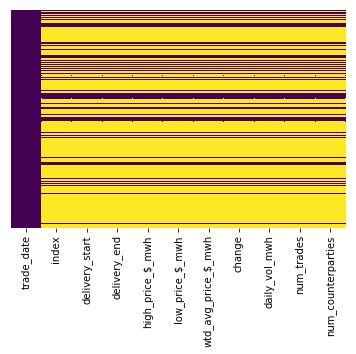

In [142]:
sns.heatmap(np_df_full_cal.isnull(), yticklabels=False, cbar=False, cmap='viridis')

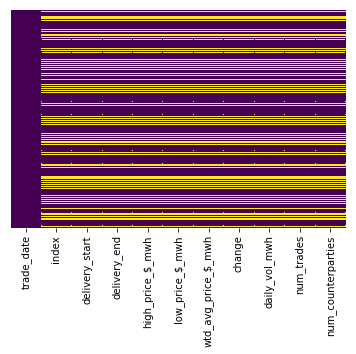

In [143]:
sns.heatmap(sp_df_full_cal.isnull(), yticklabels=False, cbar=False, cmap='viridis')

---
## CAISO NP- ans SP-15 2001 to 2013

In [28]:
ice_np_01_13 = pd.read_excel('data/NP 15 Hub.xls', names=ice_cols)
ice_sp1_01_13 = pd.read_excel('data/SP 15_1 Hub.xls', names=ice_cols)
ice_sp2_01_13 = pd.read_excel('data/SP 15_2 Hub.xls', names=ice_cols)

ice_np_01_13.drop('price_hub', axis=1, inplace=True)
ice_sp1_01_13.drop('price_hub', axis=1, inplace=True)
ice_sp2_01_13.drop('price_hub', axis=1, inplace=True)

In [38]:
date_01_13 = pd.DataFrame({'trade_date':pd.date_range(start='2001-01-01', end='2013-12-31')})
np_df_01_13 = pd.merge(date_01_13, ice_np_01_13, on='trade_date', how='left')
sp_concat = pd.concat([ice_sp1_01_13, ice_sp2_01_13], axis=0)
sp_df_01_13 = pd.merge(date_01_13, sp_concat, on='trade_date', how='left')
# sp_df_01_13 = pd.merge(sp_df_01_13, ice_sp2_01_13, on='trade_date', how='left')

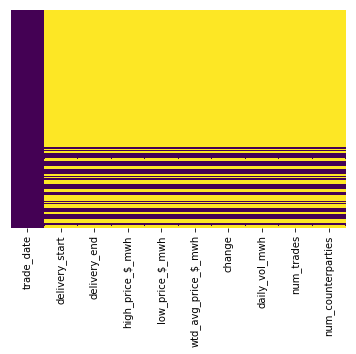

In [39]:
sns.heatmap(np_df_01_13.isnull(), yticklabels=False, cbar=False, cmap='viridis')

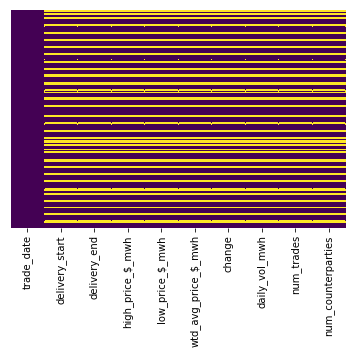

In [40]:
sns.heatmap(sp_df_01_13.isnull(), yticklabels=False, cbar=False, cmap='viridis')